# Context


Build and Train ANN following the guidelines given in the Assignment Document (PDF) and using the provided dataset from the CSV file.



# Content 


The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.



# Goal 

Build Machine Learning Model using
1. Train a Perceptron
2. Train a Neural Network

### Importing required Libraries

In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="darkgrid")

import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings("ignore")


### Reading the data file and forming the dataset

#### Afterwards NULL-check and other validations are applied.

In [2]:
df= pd.read_csv('./diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Check NaN
df.isnull().values.any()

False

In [4]:
df.shape

(768, 9)

In [5]:
#Column Names
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [7]:
#Summary Stastiscs
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
pd.pivot_table(df, index=["Outcome"], aggfunc=[np.mean])

mean                                                    \
               Age        BMI BloodPressure DiabetesPedigreeFunction   
Outcome                                                                
0        31.190000  30.304200     68.184000                 0.429734   
1        37.067164  35.142537     70.824627                 0.550500   

                                                           
            Glucose     Insulin Pregnancies SkinThickness  
Outcome                                                    
0        109.980000   68.792000    3.298000     19.664000  
1        141.257463  100.335821    4.865672     22.164179

In [9]:
pd.pivot_table(df, index=["Outcome"], aggfunc=[np.std])

std                                                   \
               Age       BMI BloodPressure DiabetesPedigreeFunction   
Outcome                                                               
0        11.667655  7.689855     18.063075                 0.299085   
1        10.968254  7.262967     21.491812                 0.372354   

                                                          
           Glucose     Insulin Pregnancies SkinThickness  
Outcome                                                   
0        26.141200   98.865289    3.017185     14.889947  
1        31.939622  138.689125    3.741239     17.679711

### Data Visualization Applied on the DataSet

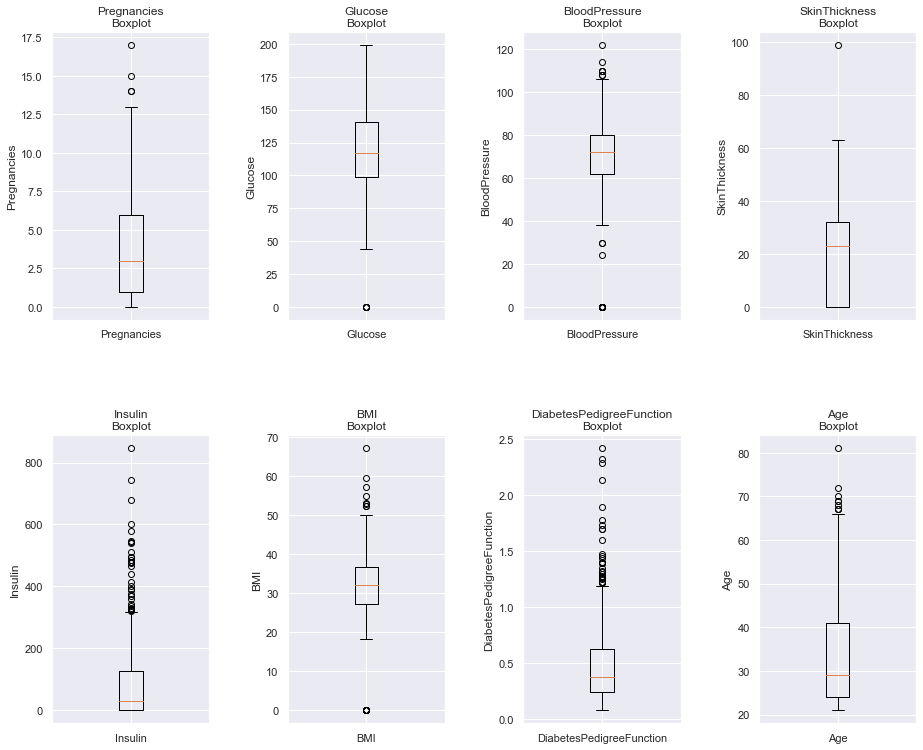

In [10]:
# Distribution of Each Feature: Boxplot
colnames = df.columns
fig, ax=plt.subplots(nrows=2, ncols=4, figsize=(15,12))
for i in range(4):
    x = colnames[i]
    ax[0,i].boxplot(df[str(x)], labels=[str(x)])
    ax[0,i].set_ylabel(str(x))
    ax[0,i].set_title(str(x) + "\nBoxplot")

for i in range(4,8):
    x = colnames[i]
    ax[1,i-4].boxplot(df[str(x)], labels=[str(x)])
    ax[1,i-4].set_ylabel(str(x))
    ax[1,i-4].set_title(str(x) + "\nBoxplot")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

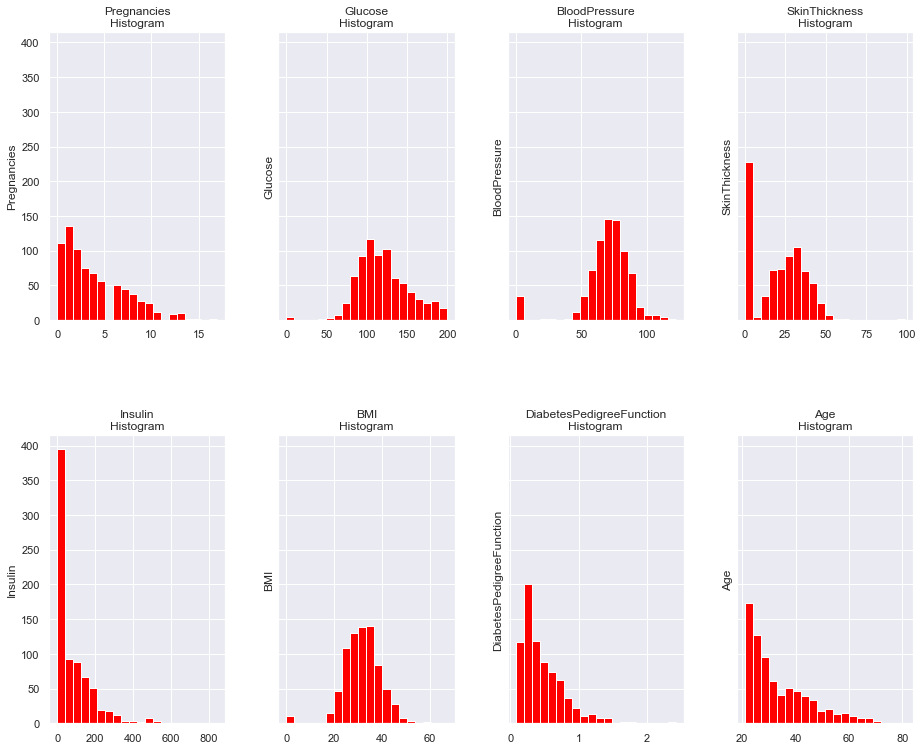

In [11]:
# Distribution of Each Feature: Histogram

fig, ax=plt.subplots(nrows=2, ncols=4, figsize=(15,12), sharey=True)
for i in range(4):
    x = colnames[i]
    ax[0,i].hist(df[str(x)], color="red", bins=20)
    ax[0,i].set_ylabel(str(x))
    ax[0,i].set_title(str(x) + "\nHistogram")

for i in range(4,8):
    x = colnames[i]
    ax[1,i-4].hist(df[str(x)], color="red", bins=20)
    ax[1,i-4].set_ylabel(str(x))
    ax[1,i-4].set_title(str(x) + "\nHistogram")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.4)

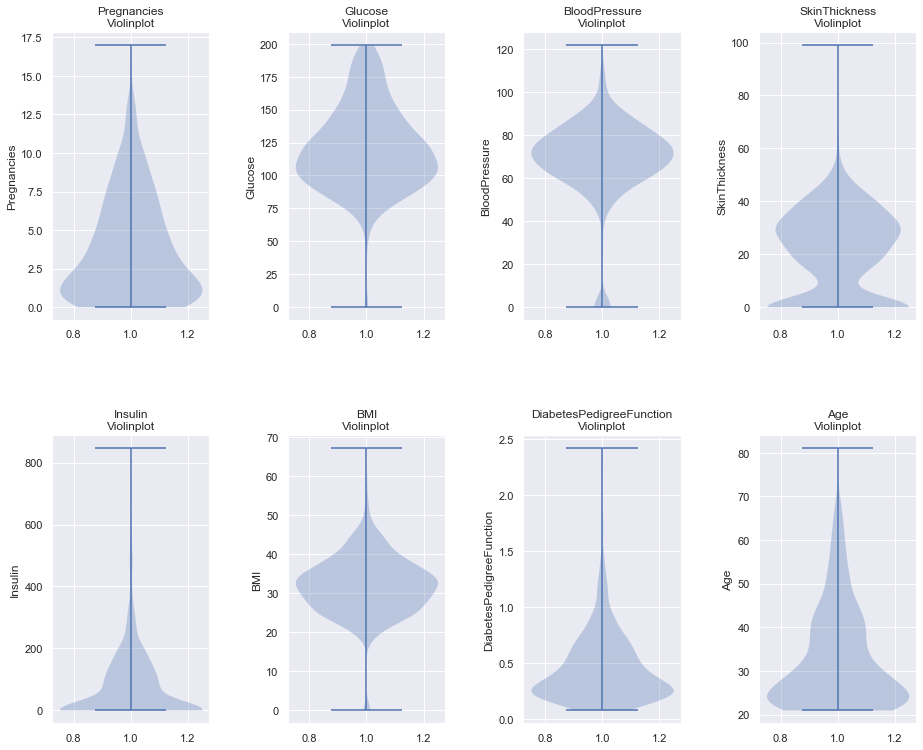

In [12]:
# Distribution of Each Feature: Violinplot

fig, ax=plt.subplots(nrows=2, ncols=4, figsize=(15,12))
for i in range(4):
    x = colnames[i]
    ax[0,i].violinplot(df[str(x)])
    ax[0,i].set_ylabel(str(x))
    ax[0,i].set_title(str(x) + "\nViolinplot")

for i in range(4,8):
    x = colnames[i]
    ax[1,i-4].violinplot(df[str(x)])
    ax[1,i-4].set_ylabel(str(x))
    ax[1,i-4].set_title(str(x) + "\nViolinplot")

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

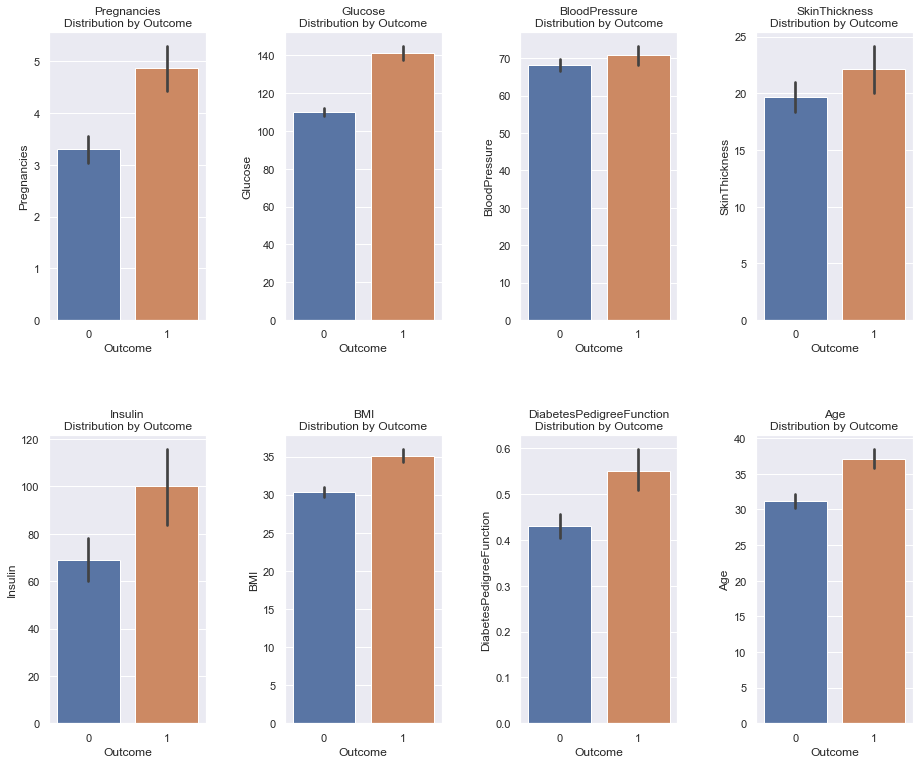

In [13]:
# Distribution of Each Feature By Outcome: Barplot

fig, ax =plt.subplots(2,4, figsize=(15,12))

for i in range(4):
    x = colnames[i]
    sns.barplot(data=df, y=str(x), x="Outcome", ax=ax[0, i])
    ax[0,i].set_title(str(x) + "\nDistribution by Outcome")

for i in range(4,8):
    x = colnames[i]
    sns.barplot(data=df, y=str(x), x="Outcome", ax=ax[1, i-4])
    ax[1,i-4].set_title(str(x) + "\nDistribution by Outcome")
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

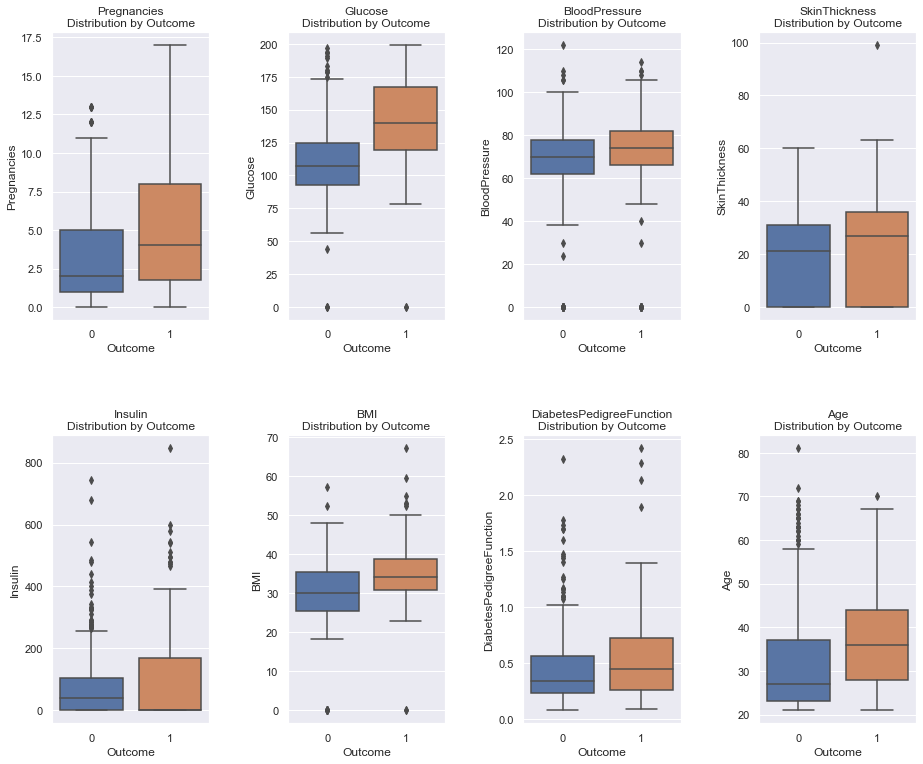

In [14]:
# Distribution of Each Feature By Outcome: Boxplot

fig, ax =plt.subplots(2,4, figsize=(15,12))

for i in range(4):
    x = colnames[i]
    sns.boxplot(data=df, y=str(x), x="Outcome", ax=ax[0, i])
    ax[0,i].set_title(str(x) + "\nDistribution by Outcome")

for i in range(4,8):
    x = colnames[i]
    sns.boxplot(data=df, y=str(x), x="Outcome", ax=ax[1, i-4])
    ax[1,i-4].set_title(str(x) + "\nDistribution by Outcome")
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

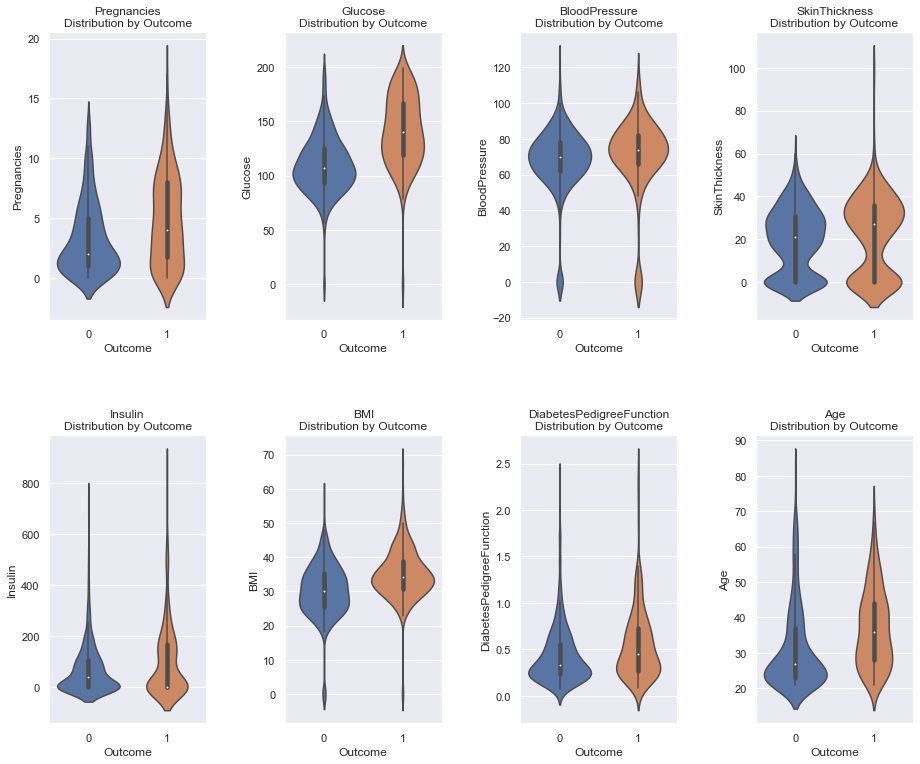

In [15]:
# Distribution of Each Feature By Outcome: Violinplot

fig, ax =plt.subplots(2,4, figsize=(15,12))

for i in range(4):
    x = colnames[i]
    sns.violinplot(data=df, y=str(x), x="Outcome", ax=ax[0, i])
    ax[0,i].set_title(str(x) + "\nDistribution by Outcome")

for i in range(4,8):
    x = colnames[i]
    sns.violinplot(data=df, y=str(x), x="Outcome", ax=ax[1, i-4])
    ax[1,i-4].set_title(str(x) + "\nDistribution by Outcome")
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

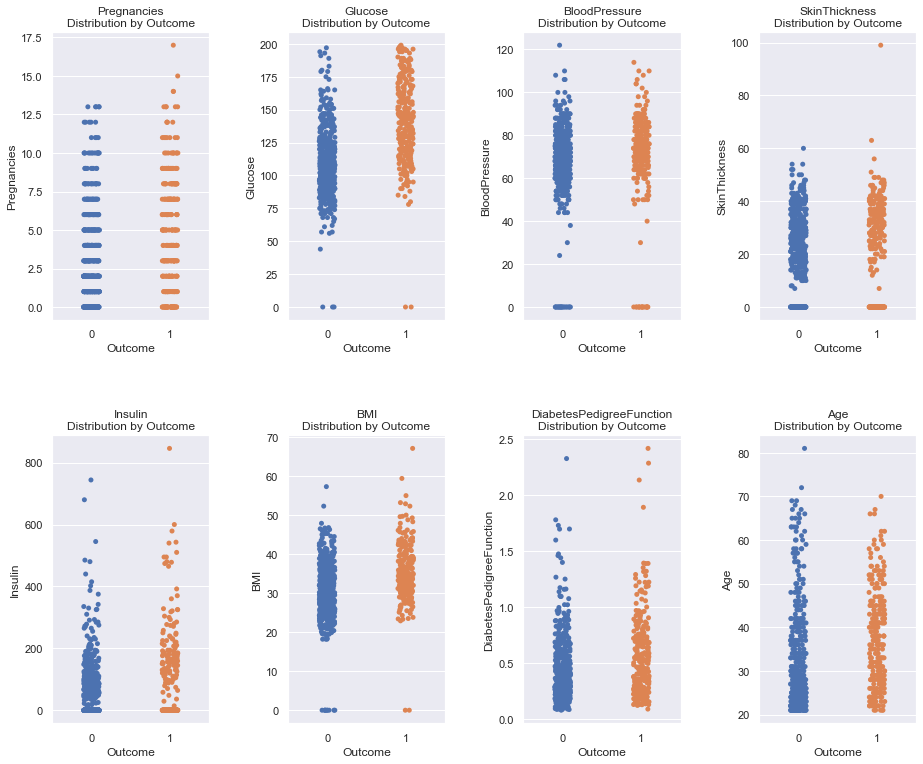

In [16]:
# Distribution of Each Feature By Outcome: Stripplot

fig, ax =plt.subplots(2,4, figsize=(15,12))

for i in range(4):
    x = colnames[i]
    sns.stripplot(data=df, y=str(x), x="Outcome", ax=ax[0, i])
    ax[0,i].set_title(str(x) + "\nDistribution by Outcome")

for i in range(4,8):
    x = colnames[i]
    sns.stripplot(data=df, y=str(x), x="Outcome", ax=ax[1, i-4])
    ax[1,i-4].set_title(str(x) + "\nDistribution by Outcome")
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

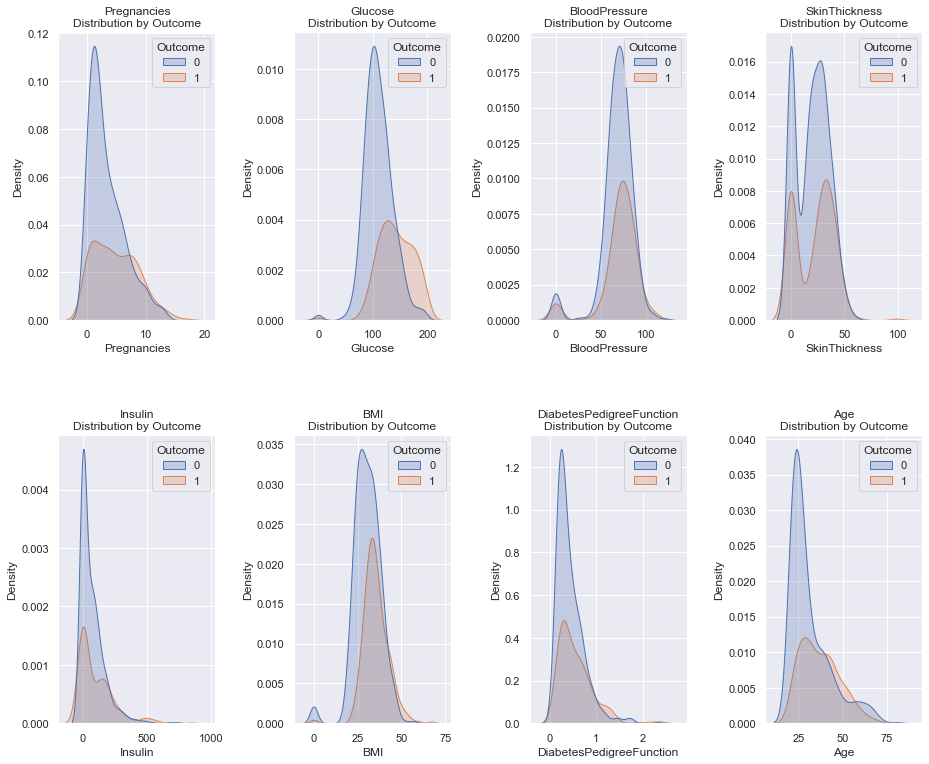

In [17]:
# Distribution of Each Feature By Outcome: Density plot

fig, ax =plt.subplots(2,4, figsize=(15,12))

for i in range(4):
    x = colnames[i]
    sns.kdeplot(data=df, x=str(x), hue="Outcome", shade=True, ax=ax[0, i])
    ax[0,i].set_title(str(x) + "\nDistribution by Outcome")

for i in range(4,8):
    x = colnames[i]
    sns.kdeplot(data=df, x=str(x), hue="Outcome", shade=True, ax=ax[1, i-4])
    ax[1,i-4].set_title(str(x) + "\nDistribution by Outcome")
    
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.5, 
                    hspace=0.4)

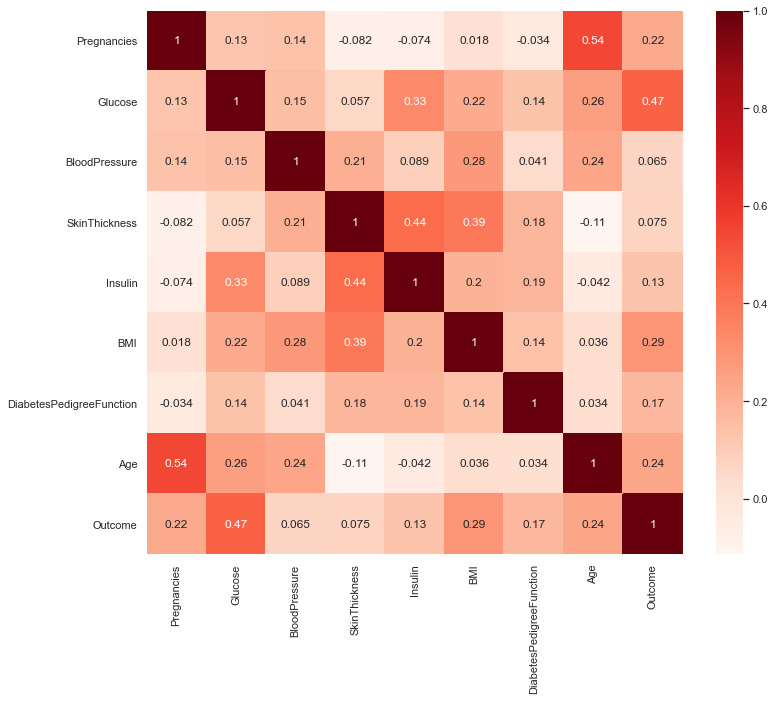

In [18]:
#Using Pearson Correlation to create Correlation heatmap
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

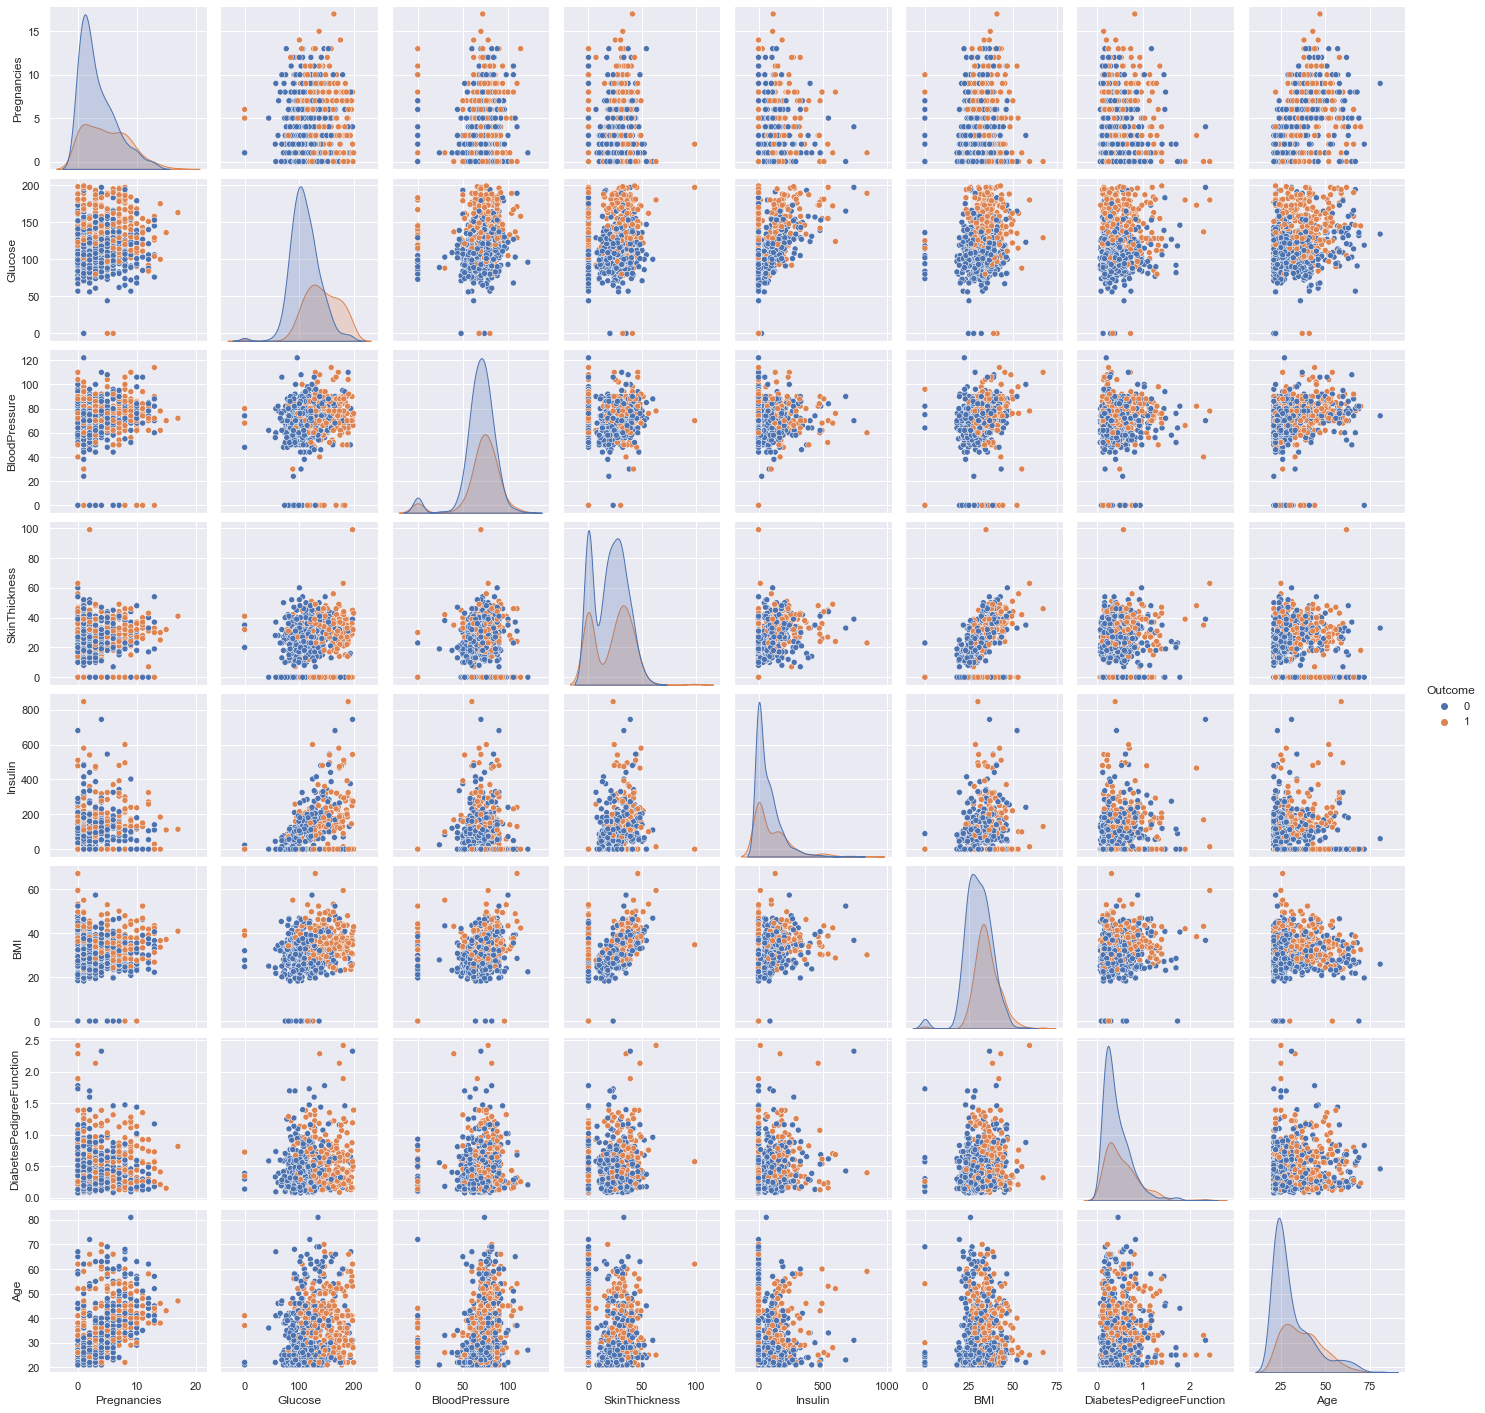

In [19]:
# Pairwise Plotting
# Principal Diagonal Plots- Univaraite Analysis (Density plots) coloured by Outcome
# Other Plots: Bivariate Analysis (Scatter plots) coloured by Outcome
sns.pairplot(data=df, hue="Outcome")

Conclusion from the correlation matrix:- 1. Glucose level plays the most important role in determining the whether the person is diabetic or not. 2. After that, BMI, pregnancy and Age plays the second most important role. 3. Third comes insulin and DiabetesPedigreeFunction. 4. And finally all other factors plays minor role as well.

Lets analyse the dataset a little more. You can skip the data visualization and exploratory data analysis after this and jump directly into the 'ANN with pytorch' section if you are not interested.

### Other observation...

From the above observation we can say that the dataset is not imbalanced as one type of outcome does not dominate the dataset completely

So from the above data things that we can conclude are :-
1. People with higher glucose level has more chances of diabetes as the mean value suggests
2. However someone with zero glucose level can also be affected with diabetes. 
3. And someone with very high glucose level around 197 may not suffer from diabetes. 

# 1) Train a Perceptron

### Building the functionalities for data processing for Perceptron...

In [25]:
def polynom(indices_list, indices, a, b, p):
    indices = [*indices]
    if p == 0:
        indices_list.append(indices)
        return
    for i in range(a, b):
        indices.append(i)
        polynom(indices_list, indices, i, b, p-1)
        indices = indices[0:-1]

def polynomial_features(X: np.ndarray, p) -> np.ndarray:
    n, d = X.shape
    features = []
    for i in range(1, p+1):
        l = []
        polynom(l, [], 0, d, i)
        for indices in l:
            x = np.ones((n,))
            for idx in indices:
                x = x * X[:, idx]
            features.append(x)
    return np.stack(features, axis=1)

In [26]:
def plot_data_points(ax, X, y):
    neg_class = (y == -1)
    pos_class = (y == 1)
    ax.scatter(X[neg_class, 0], X[neg_class, 1])
    ax.scatter(X[pos_class, 0], X[pos_class, 1])

def plot_decision_boundary(ax, clf, X, p):
    X_cpy = X.copy()
    margin = 0.5
    x_min = np.min(X_cpy[:, 0])-margin
    x_max = np.max(X_cpy[:, 0])+margin
    y_min = np.min(X_cpy[:, 1])-margin
    y_max = np.max(X_cpy[:, 1])+margin
    n = 1000
    x = np.linspace(x_min, x_max, num=n)
    y = np.linspace(y_min, y_max, num=n)
    x, y = np.meshgrid(x, y)
    X_cpy = np.stack([x.reshape((n*n,)), y.reshape((n*n,))], axis=1)
    X_cpy = polynomial_features(X_cpy, p)
    z = clf.predict(X_cpy)
    z = z.reshape((n, n))
    ax.contour(x, y, z, levels=[0])

In [27]:
def anim_fig(weights, X, y, X_train, y_train, X_test, y_test, out_folder, p, n_iter, i, j, n_samples, iteration_level):
    clf = Perceptron()
    clf.weights = weights

    plt.clf()
    fig, (ax_train, ax_test) = plt.subplots(nrows=1, ncols=2, dpi=120, figsize=(16,6))
    
    if iteration_level:
        plot_data_points(ax_train, X_train, y_train)
    else:
        mask = np.ones((n_samples,), dtype=bool)
        mask[j] = False
        plot_data_points(ax_train, X_train[mask, :], y_train[mask])
        ax_train.scatter(X_train[j, 0], X_train[j, 1], c='lime')
    
    plot_data_points(ax_test, X_test, y_test)

    plot_decision_boundary(ax_train, clf, X, p)
    plot_decision_boundary(ax_test, clf, X, p)

    ax_train.set_title('Train')
    ax_test.set_title('Test')

    if iteration_level:
        fig.suptitle(f'Iteration: {i+1}/{n_iter}', fontsize=14)
    else:
        fig.suptitle(f'Iteration: {i+1}/{n_iter}; Point: {j+1}/{n_samples}', fontsize=14)
    k = i if iteration_level else i*n_samples+j
    plt.savefig(f'{out_folder}/frame{k}.png')
    plt.close(fig)

def perceptron_anim(X, y, X_train, y_train, X_test, y_test, out_folder, iteration_level, p=1, n_iter=100):

    n_samples = X_train.shape[0]
    n_features = X_train.shape[1]

    weights = np.zeros((n_features+1,))

    X_train = np.concatenate([X_train, np.ones((n_samples, 1))], axis=1)

    for i in range(n_iter):
        for j in range(n_samples):
            if y_train[j]*np.dot(weights, X_train[j, :]) <= 0:
                weights += y_train[j]*X_train[j, :]
                
            if not iteration_level:
                anim_fig(weights, X, y, X_train, y_train, X_test, y_test, out_folder, p, n_iter, i, j, n_samples, iteration_level)
        if iteration_level:
            anim_fig(weights, X, y, X_train, y_train, X_test, y_test, out_folder, p, n_iter, i, j, n_samples, iteration_level)

In [28]:

#Split x and y
x=df.drop(['Outcome'], axis=1)
y=df['Outcome']

#Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x=pd.DataFrame(x_scaled, columns=x.columns)

#Split test and train, and validation
from sklearn.model_selection import train_test_split
itrain_x, test_x, itrain_y, test_y=train_test_split(x, y, random_state=56, stratify=y, test_size=0.1)
train_x, valid_x, train_y, valid_y=train_test_split(itrain_x, itrain_y, random_state=56, stratify=itrain_y, test_size=1/9)

In [29]:
class Perceptron:    
    def fit(self, X, y, n_iter=100):
        
        n_samples = X.shape[0]
        n_features = X.shape[1]
        
        # Add 1 for the bias term
        self.weights = np.zeros((n_features+1,))
        
        # Add column of 1s
        X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
        
        for i in range(n_iter):
            for j in range(n_samples):
                if y[j]*np.dot(self.weights, X[j, :]) <= 0:
                    self.weights += y[j]*X[j, :]
    
    def predict(self, X):
        if not hasattr(self, 'weights'):
            print('The model is not trained yet!')
            return
        
        n_samples = X.shape[0]
        # Add column of 1s
        X = np.concatenate([X, np.ones((n_samples, 1))], axis=1)
        y = np.matmul(X, self.weights)
        y = np.vectorize(lambda val: 1 if val > 0 else -1)(y)
        
        return y
    
    def score(self, X, y):
        pred_y = self.predict(X)
        
        return np.mean(y == pred_y)

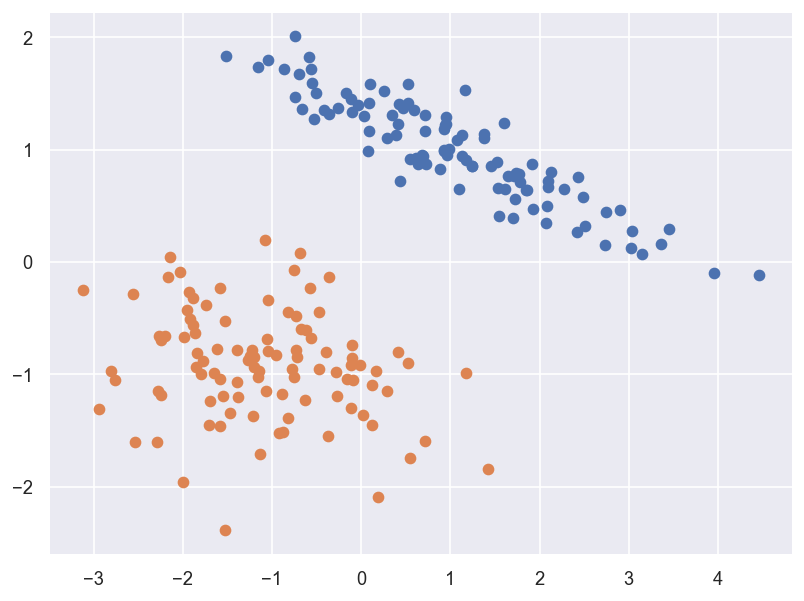

1.0

<Figure size 432x288 with 0 Axes>

In [30]:
# Assets generation

X = np.load('X_lin_sep.npy')
y = np.load('y_lin_sep.npy')

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(8,6))
plot_data_points(ax, X, y)
plt.savefig('output/lin_sep/figure.png')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

perceptron_anim(X, y, X_train, y_train, X_test, y_test, 'output/lin_sep/anim', iteration_level=False, p=1, n_iter=2)

perceptron = Perceptron()
perceptron.fit(X_train, y_train)

perceptron.score(X_test, y_test)

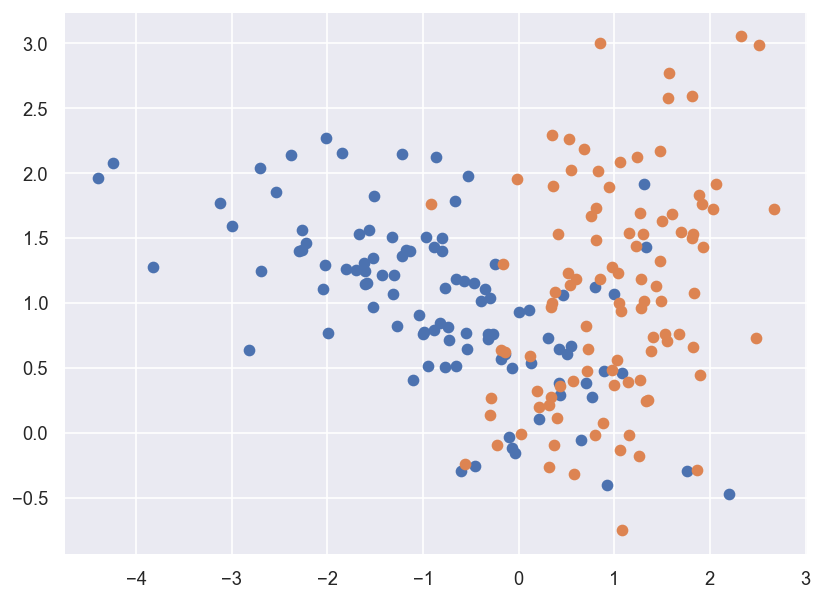

0.72

<Figure size 432x288 with 0 Axes>

In [31]:
# Assets generation

X = np.load('X_lin_noise.npy')
y = np.load('y_lin_noise.npy')

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(8,6))
plot_data_points(ax, X, y)
plt.savefig('output/lin_noise/figure.png')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

perceptron_anim(X, y, X_train, y_train, X_test, y_test, 'output/lin_noise/anim', iteration_level=True, p=1, n_iter=100)

perceptron = Perceptron()
perceptron.fit(X_train, y_train)

perceptron.score(X_test, y_test)

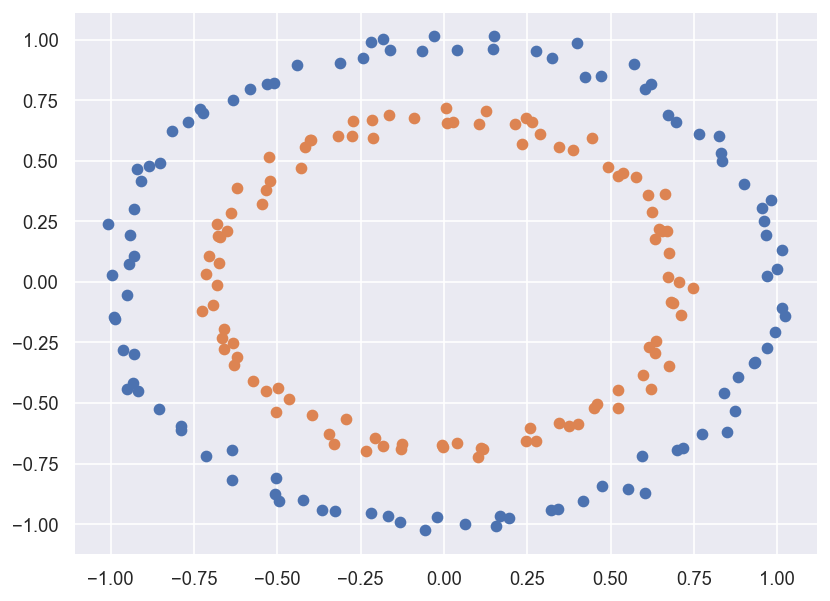

1.0

<Figure size 432x288 with 0 Axes>

In [32]:
# Assets generation

X = np.load('X_circles.npy')
y = np.load('y_circles.npy')

X = polynomial_features(X, 2)

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(8,6))
plot_data_points(ax, X, y)
plt.savefig('output/circles/figure.png')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

perceptron_anim(X, y, X_train, y_train, X_test, y_test, 'output/circles/anim', iteration_level=False, p=2, n_iter=3)

perceptron = Perceptron()
perceptron.fit(X_train, y_train, n_iter=3)

perceptron.score(X_test, y_test)

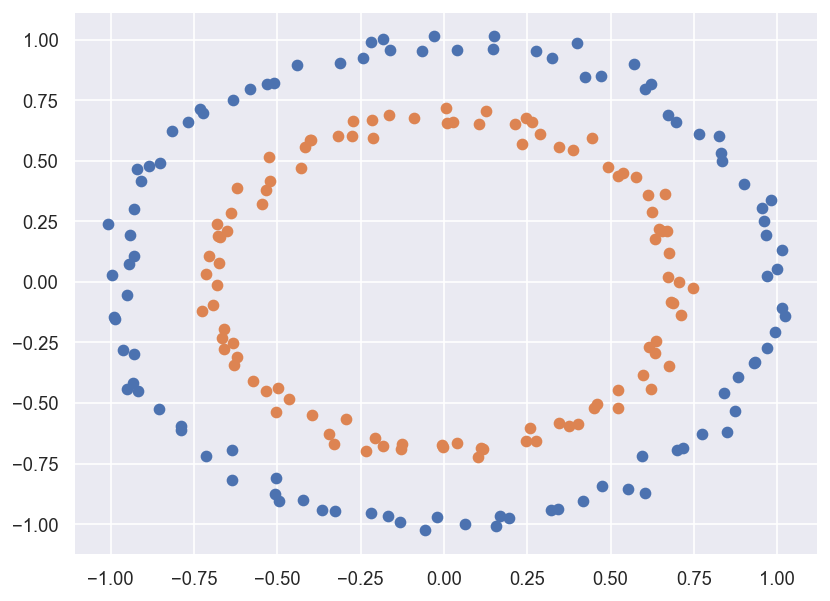

In [33]:
# Assets generation

X = np.load('X_circles.npy')
y = np.load('y_circles.npy')

X = polynomial_features(X, 2)

fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(8,6))
plot_data_points(ax, X, y)
plt.savefig('output/licenta/figure.png')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

#perceptron_anim(X, y, X_train, y_train, X_test, y_test, 'output/circles/anim', iteration_level=False, p=2, n_iter=3)

perceptron = Perceptron()
perceptron.fit(X_train, y_train, n_iter=3)

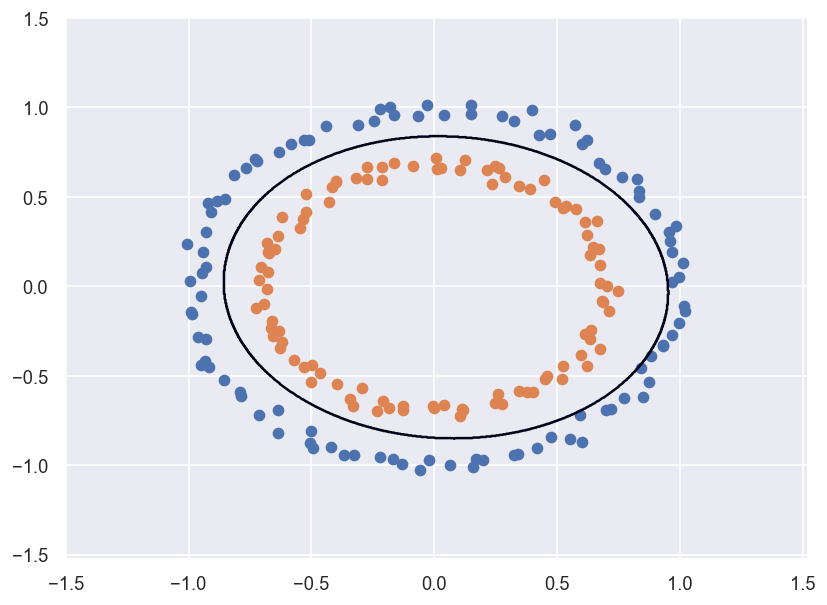

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, dpi=120, figsize=(8,6))
plot_data_points(ax, X, y)
plot_decision_boundary(ax, perceptron, X, 2)
plt.savefig('output/licenta/figure2.png')
plt.show()

# 2) Train a Neural Network

## ANN Implementation

The neural network that I am going to apply here will have three layers 
- hidden layer 1 - 8 neurons 
- hidden layer 2 - 4 neurons
- hidden layer 3 - 3 neurons 

In [35]:
#defining f1 score and recall score metric
import keras.backend as K
def f1_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val
def recall_metric(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

np.random.seed(52)
#Initialising ANN
ann = tf.keras.models.Sequential()

#Adding First Hidden Layer with 8 neurons
ann.add(tf.keras.layers.Dense(units=8,activation="relu"))

#Adding Second Hidden Layer with 4 neurons
ann.add(tf.keras.layers.Dense(units=4,activation="relu"))

#Adding Third Hidden Layer with 3 neurons
ann.add(tf.keras.layers.Dense(units=3,activation="relu"))

#Adding Output Layer with 1 neuron as it's a classification problem.
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=[f1_metric])
#Binary cross entropy is the loss function we use for classification purposes.
#The popular adam optimizer has been used as a trial.

np.random.seed(52)
#Fitting ANN
ann.fit(train_x,train_y,batch_size=128,epochs = 100)
#Used a mini batch gradient descent for trial, 32 is a popular batch size and each training sample will be use 100 times.

Epoch 1/100
5/5 [==============================] - 1s 3ms/step - loss: 0.6846 - f1_metric: 0.0716
Epoch 2/100
5/5 [==============================] - 0s 1ms/step - loss: 0.6788 - f1_metric: 0.0516
Epoch 3/100
5/5 [==============================] - 0s 1ms/step - loss: 0.6729 - f1_metric: 0.0523
Epoch 4/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6671 - f1_metric: 0.0327
Epoch 5/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6611 - f1_metric: 0.0226
Epoch 6/100
5/5 [==============================] - 0s 1ms/step - loss: 0.6551 - f1_metric: 0.0157
Epoch 7/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6492 - f1_metric: 0.0000e+00
Epoch 8/100
5/5 [==============================] - 0s 2ms/step - loss: 0.6435 - f1_metric: 0.0000e+00
Epoch 9/100
5/5 [==============================] - 0s 1ms/step - loss: 0.6379 - f1_metric: 0.0000e+00
Epoch 10/100
5/5 [==============================] - 0s 1ms/step - loss: 0.6321 - f1_metric: 0.0000e+00
Epo

5/5 [==============================] - 0s 1ms/step - loss: 0.5013 - f1_metric: 0.6453
Epoch 82/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5008 - f1_metric: 0.6423
Epoch 83/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5004 - f1_metric: 0.6496
Epoch 84/100
5/5 [==============================] - 0s 1ms/step - loss: 0.5000 - f1_metric: 0.6556
Epoch 85/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4996 - f1_metric: 0.6579
Epoch 86/100
5/5 [==============================] - 0s 914us/step - loss: 0.4993 - f1_metric: 0.6617
Epoch 87/100
5/5 [==============================] - 0s 909us/step - loss: 0.4990 - f1_metric: 0.6575
Epoch 88/100
5/5 [==============================] - 0s 924us/step - loss: 0.4986 - f1_metric: 0.6571
Epoch 89/100
5/5 [==============================] - 0s 916us/step - loss: 0.4983 - f1_metric: 0.6570
Epoch 90/100
5/5 [==============================] - 0s 1ms/step - loss: 0.4980 - f1_metric: 0.6583
Epoch 91/100
5/

In [36]:
#ANN Classifier

valid_predict = ann.predict(valid_x)
valid_predict

array([[0.02470472],
       [0.38974166],
       [0.28940415],
       [0.5345109 ],
       [0.2562495 ],
       [0.45136997],
       [0.2773565 ],
       [0.5345109 ],
       [0.5345109 ],
       [0.01858714],
       [0.37637413],
       [0.38743567],
       [0.17888951],
       [0.1467154 ],
       [0.01582095],
       [0.23392293],
       [0.45405692],
       [0.19802335],
       [0.5345109 ],
       [0.3325352 ],
       [0.4886186 ],
       [0.13816556],
       [0.46934044],
       [0.4341635 ],
       [0.07978627],
       [0.02706623],
       [0.32175732],
       [0.48859617],
       [0.5345109 ],
       [0.5345109 ],
       [0.03851268],
       [0.5345109 ],
       [0.5297648 ],
       [0.04612559],
       [0.5345109 ],
       [0.5345109 ],
       [0.07645899],
       [0.5345109 ],
       [0.29681525],
       [0.5345109 ],
       [0.5345109 ],
       [0.5345109 ],
       [0.08889064],
       [0.5345109 ],
       [0.50895554],
       [0.40817356],
       [0.47771266],
       [0.534

Text(0.5, 1.0, 'Elbow Curve for ANN')

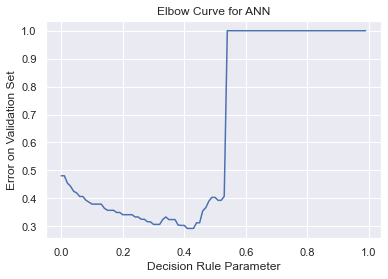

In [37]:
#Decision Rule (By maximising f1 score on the validation set):
er=[]
for i in range(0, 100, 1):
    v=i/100
    def func_dec(x):
        if x >= v:
            return 1
        else:
            return 0
    valid_predict_clf=list(map(func_dec, valid_predict))
    er_f1 = 1-f1_score(valid_y, valid_predict_clf)
    er.append(er_f1)
    
i=list(range(0, 100, 1))
v = list(map(lambda x: x/100, i))
plt.plot(v, er)
plt.xlabel("Decision Rule Parameter")
plt.ylabel("Error on Validation Set")
plt.title("Elbow Curve for ANN")

In [38]:
#Making Final Predictions and evaluating performance
np.random.seed(52)
ann.fit(itrain_x,itrain_y,batch_size=128,epochs = 100)
test_predict = ann.predict(test_x)
#Using Decision Rule with Optimum Parameter:
def func_dec_opt(x):
    if x >= v[er.index(min(er))]:
        return 1
    else:
        return 0
test_predict_clf=list(map(func_dec_opt, test_predict))

print( "Accuracy on Test:", accuracy_score(test_y, test_predict_clf),
      "\nRecall on Test:", recall_score(test_y, test_predict_clf),
     "\nF1 Score on Test:", f1_score(test_y, test_predict_clf))

Epoch 1/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4941 - f1_metric: 0.6459
Epoch 2/100
6/6 [==============================] - 0s 1ms/step - loss: 0.4937 - f1_metric: 0.6448
Epoch 3/100
6/6 [==============================] - 0s 1ms/step - loss: 0.4933 - f1_metric: 0.6881
Epoch 4/100
6/6 [==============================] - 0s 1ms/step - loss: 0.4930 - f1_metric: 0.6627
Epoch 5/100
6/6 [==============================] - 0s 1ms/step - loss: 0.4926 - f1_metric: 0.6706
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4922 - f1_metric: 0.6697
Epoch 7/100
6/6 [==============================] - 0s 1ms/step - loss: 0.4919 - f1_metric: 0.6682
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4915 - f1_metric: 0.6562
Epoch 9/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4912 - f1_metric: 0.6689
Epoch 10/100
6/6 [==============================] - 0s 3ms/step - loss: 0.4909 - f1_metric: 0.6744
Epoch 11/100
6/6 [=

6/6 [==============================] - 0s 956us/step - loss: 0.4716 - f1_metric: 0.6993
Epoch 84/100
6/6 [==============================] - 0s 748us/step - loss: 0.4713 - f1_metric: 0.6861
Epoch 85/100
6/6 [==============================] - 0s 553us/step - loss: 0.4710 - f1_metric: 0.6798
Epoch 86/100
6/6 [==============================] - 0s 870us/step - loss: 0.4708 - f1_metric: 0.7021
Epoch 87/100
6/6 [==============================] - 0s 1ms/step - loss: 0.4705 - f1_metric: 0.6919
Epoch 88/100
6/6 [==============================] - 0s 1ms/step - loss: 0.4701 - f1_metric: 0.7061
Epoch 89/100
6/6 [==============================] - 0s 1ms/step - loss: 0.4698 - f1_metric: 0.6802
Epoch 90/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4697 - f1_metric: 0.6971
Epoch 91/100
6/6 [==============================] - 0s 2ms/step - loss: 0.4693 - f1_metric: 0.7018
Epoch 92/100
6/6 [==============================] - 0s 895us/step - loss: 0.4691 - f1_metric: 0.6984
Epoch 93/100


### The Accuracy Report:

Derived from the above...

Accuracy on Test: 0.7402597402597403 

Recall on Test: 0.7777777777777778 

F1 Score on Test: 0.6774193548387097

Classification report : 
               precision    recall  f1-score   support

           1       0.60      0.78      0.68        27
           0       0.86      0.72      0.78        50

    accuracy                           0.74        77
   macro avg       0.73      0.75      0.73        77
weighted avg       0.77      0.74      0.75        77



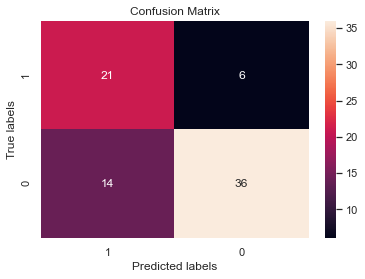

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Confusion Matrix:
cm = confusion_matrix(test_y, test_predict_clf, labels=[1,0])
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['1', '0']); ax.yaxis.set_ticklabels(['1', '0']);

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(test_y, test_predict_clf, labels=[1,0])
print('Classification report : \n',matrix)

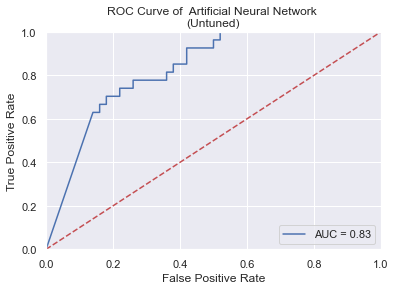

In [40]:
np.random.seed(52)
test_predict = ann.predict(test_x)
#Untuned ANN ROC Curve:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, threshold = roc_curve(test_y, test_predict)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of  Artificial Neural Network \n(Untuned)')
plt.show()

# The End